# SVM Classifier
---

### Objectives:

- Use SVM Classifier for classification

- Preprocess data for modeling

- Implement Model Classifier for Credit Card Fraud Detection 

### Installs:

In [0]:
%%capture
%pip install numpy==2.4.0
%pip install pandas==2.3.3
%pip install scikit-learn==1.8.0
%pip install matplotlib==3.10.8
%pip install seaborn==0.13.0

In [0]:
# Command to restart the kernel and update the installed libraries
%restart_python

### Imports:

In [0]:
# Data Analize and Visualization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Modeling / Model Linear / Metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, ConfusionMatrixDisplay

# Warnings
import warnings
warnings.filterwarnings('ignore')

### Load the data

In [0]:
df = pd.read_csv('./data/creditcard.csv')

### Verify successful load with some randomly selected records


In [0]:
df.sample(9)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
251070,155197.0,1.870897,0.476169,-0.508213,3.947951,0.322487,-0.025683,0.203307,-0.140235,-0.769444,1.339440,-1.295457,0.371409,0.751318,-0.171709,-1.577461,0.348085,-0.499158,-0.720885,-1.428012,-0.228282,0.101600,0.491255,0.064040,0.007766,0.141246,0.095659,-0.020601,-0.046461,22.75,0
132151,79876.0,1.395185,-0.974230,-0.618872,-1.793675,1.005047,3.537637,-1.575905,0.925333,-0.545437,0.657655,-0.076650,-0.760277,0.358918,-0.321243,1.294534,1.803401,-0.448227,-0.416126,0.588955,0.257043,0.340145,0.750075,-0.154904,1.050152,0.583007,-0.036275,0.037060,0.022424,29.99,0
78163,57398.0,-1.486860,-0.283238,1.702665,-0.412733,-0.923646,0.583449,1.849450,-0.296578,-0.128758,-0.660295,0.689868,0.194946,-0.466822,-0.265748,-0.641998,0.612956,-0.921132,0.434026,-0.101692,-0.049165,-0.060797,0.068543,-0.218132,0.049293,0.394647,0.374339,-0.071231,-0.306142,388.90,0
217549,140934.0,1.950657,2.612211,-4.694699,4.820112,2.770830,-2.171335,1.427828,-0.517477,-1.984163,-1.809766,1.393383,-1.723490,0.017675,-7.729755,0.079588,3.149464,5.647547,2.997946,-2.705019,-0.032421,-0.318012,-0.795677,-0.147785,-0.817038,0.416440,0.152807,0.018576,0.115294,0.77,0
58618,48472.0,-1.234256,1.398540,1.003628,-0.262309,0.137859,-0.640664,0.813182,-0.097181,0.042451,0.577363,-0.559714,0.455673,1.347771,-0.350673,0.818526,0.247762,-0.681384,-0.386300,0.116123,0.511363,-0.366621,-0.645533,0.023888,-0.109927,0.098936,0.117121,0.599932,0.355901,30.99,0
262357,160435.0,2.183914,-0.212178,-2.509010,-1.706591,0.588704,-1.577528,0.711723,-0.594947,1.034595,-0.780224,-0.617822,0.768055,0.549081,0.683143,0.959911,-1.053141,-0.249475,-0.376835,0.950021,-0.118265,0.099728,0.460162,-0.052355,0.552971,0.520090,-0.096949,-0.062241,-0.069015,18.03,0
222003,142782.0,-3.959793,-1.993743,0.574785,-0.489649,0.865661,-0.049664,-0.385789,0.887409,0.261580,-1.202869,-0.123332,0.743517,0.101750,0.232664,-0.490011,0.900037,-0.937763,1.012015,-0.263050,-0.335823,0.186422,0.550362,0.141874,0.184239,0.991280,-0.224333,-0.390912,-0.741704,4.99,0
187608,127605.0,1.917323,-0.334195,-0.375917,0.912741,0.048849,1.131663,-0.851318,0.334514,0.843088,0.269774,-0.033981,1.150240,1.134342,-0.262326,0.044941,1.009916,-1.425557,0.954797,-0.076613,-0.078504,0.068041,0.294951,0.148701,-0.378104,-0.207064,-0.739335,0.073339,-0.028290,28.00,0
169047,119498.0,1.864538,0.188608,-0.275209,3.451696,0.502625,1.549494,-0.616943,0.378742,-0.589199,1.511715,-0.369651,0.468108,0.716565,-0.218459,-1.223997,1.544745,-1.468845,0.707949,-1.188270,-0.157030,0.214603,0.676617,0.057621,-0.209664,-0.072146,0.076398,0.007287,-0.042161,19.16,0



### Understand the data

---

#### Scenario

Financial institutions and credit card companies are constantly working to recognize fraudulent credit card transactions. The main goal is to protect customers so they are not charged for items they did not purchase. The challenge lies in accurately identifying fraud patterns in real-time without blocking legitimate transactions (false positives).

#### Loading Credit Card Fraud Data

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents a snapshot of transactions that occurred over a period of two days.

#### About the Dataset

This is a classic imbalance classification dataset, where each row represents a single transaction. The positive class (frauds) accounts for only 0.172% of all transactions (492 frauds out of 284,807). Due to confidentiality issues, most of the original features have been transformed using PCA (Principal Component Analysis).

The dataset consists of numerical variables only:

* **V1, V2, ... V28**: Principal components obtained with PCA. The original background information about these features is not available.

* **Time**: Contains the seconds elapsed between each transaction and the first transaction in the dataset.

* **Amount**: The transaction amount. This feature is crucial for example-dependent cost-sensitive learning.

* **Class**: The target variable. It takes the value **1 in case of fraud** and **0 otherwise**.

### Explore the data
First, consider a statistical summary of the data.

In [0]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,2.238554e-15,1.724421e-15,-1.245415e-15,8.238900e-16,1.213481e-15,4.866699e-15,1.436219e-15,-3.768179e-16,9.707851e-16,1.036249e-15,6.418678e-16,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Check distribution of target variable

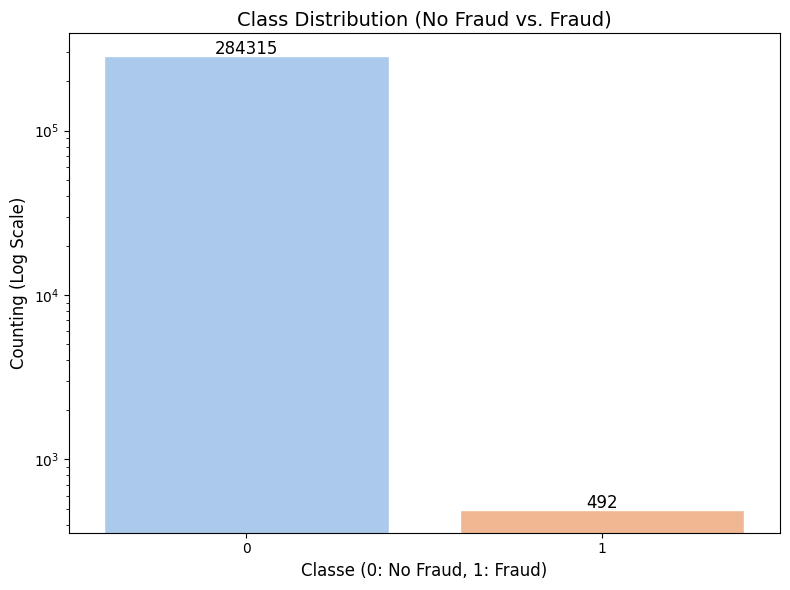

In [0]:
# Create Figure
plt.figure(figsize = (8, 6))

# Count Plot
ax = sns.countplot(
    x = 'Class',
    data = df,
    edgecolor = 'white',
    palette = 'pastel',
    
)

plt.title('Class Distribution (No Fraud vs. Fraud)', fontsize = 14)
plt.xlabel('Classe (0: No Fraud, 1: Fraud)', fontsize = 12)
plt.ylabel('Counting (Log Scale)', fontsize = 12)

# Adjusting the y-axis to the logarithmic scale to visualize the minority class.
ax.set_yscale('log')

# Add the exact numbers above the bars 
for p in  ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points', 
                fontsize = 12
    )

plt.tight_layout()
plt.show()

### Checking the correlations between the variables

In [0]:
df.corr()['Class'].abs().sort_values(ascending = False)

Class     1.000000
V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64

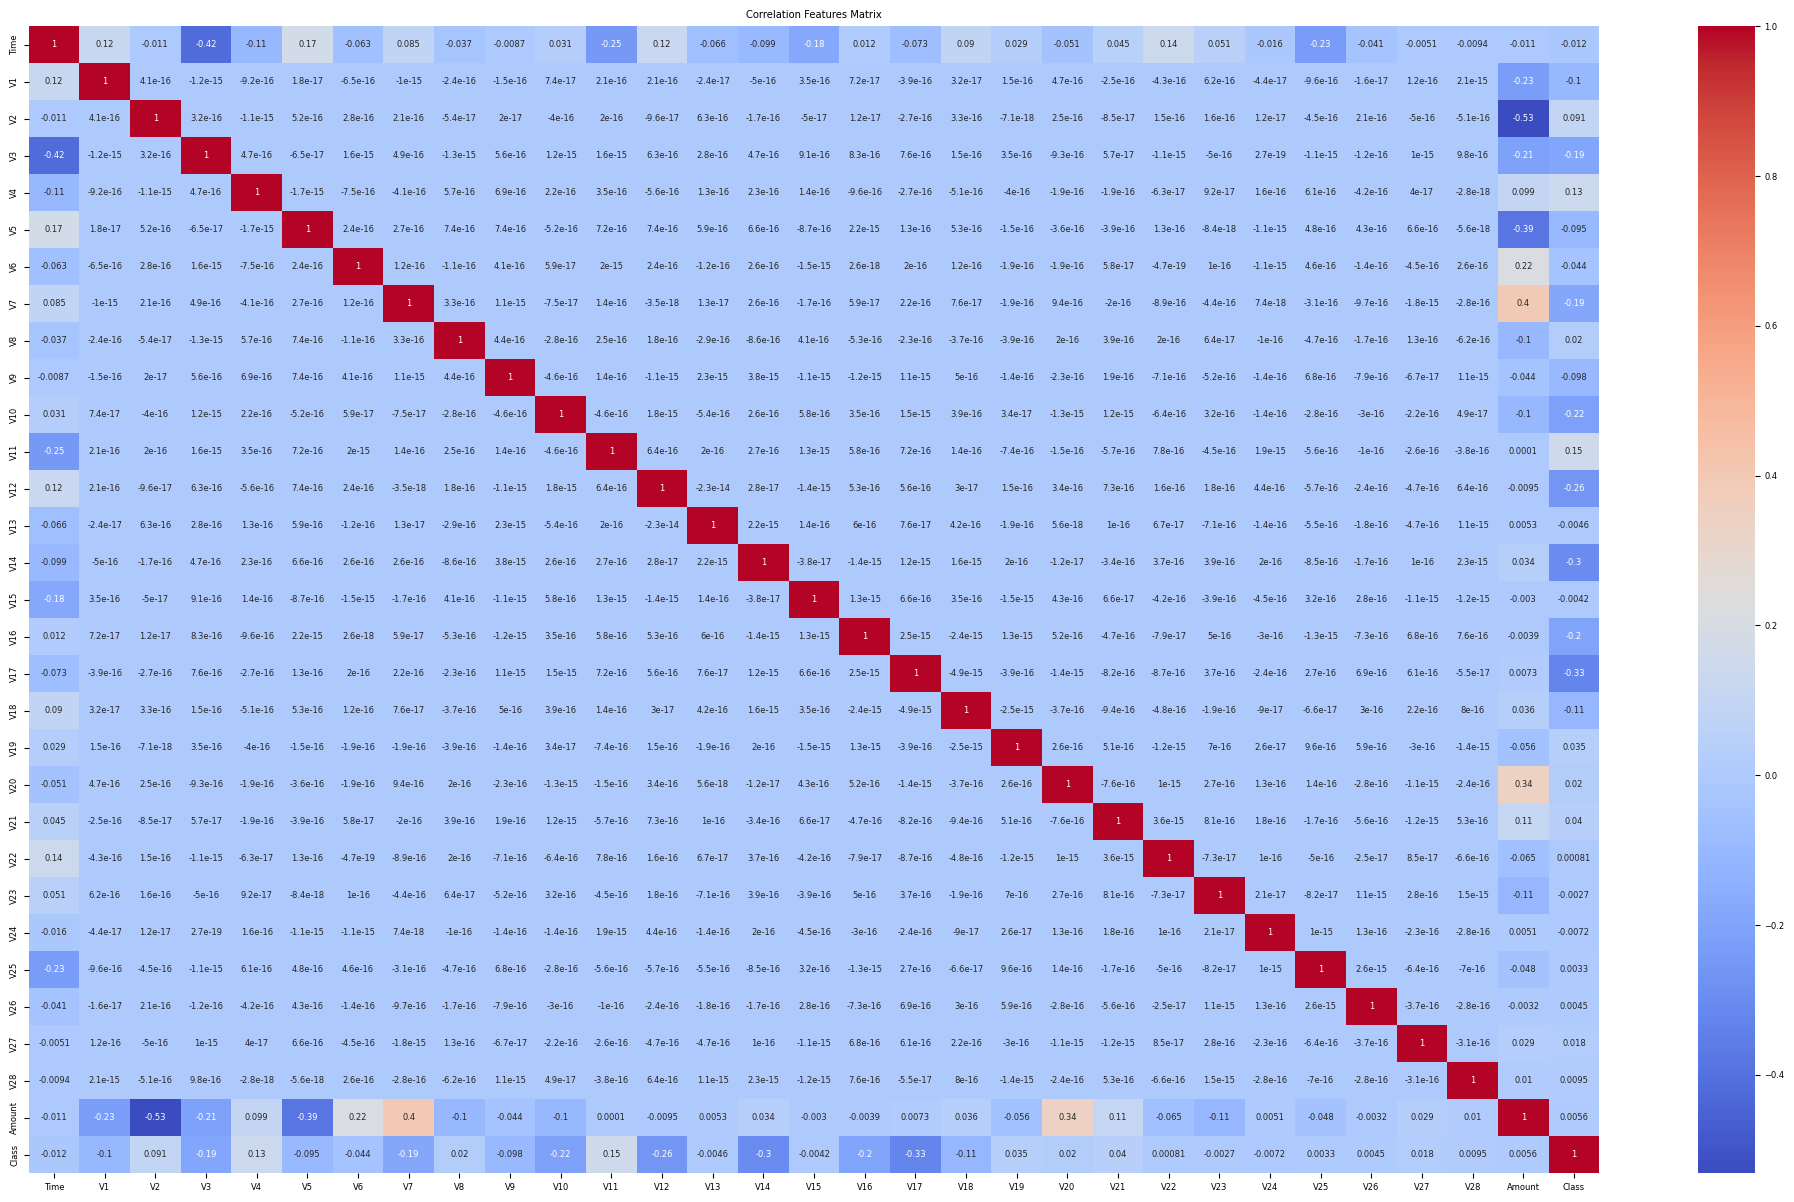

In [0]:
plt.rc('font', size = 6)
fig, ax = plt.subplots(figsize = (20, 12))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', ax = ax)
ax.set_title('Correlation Features Matrix')
plt.tight_layout()
plt.show()

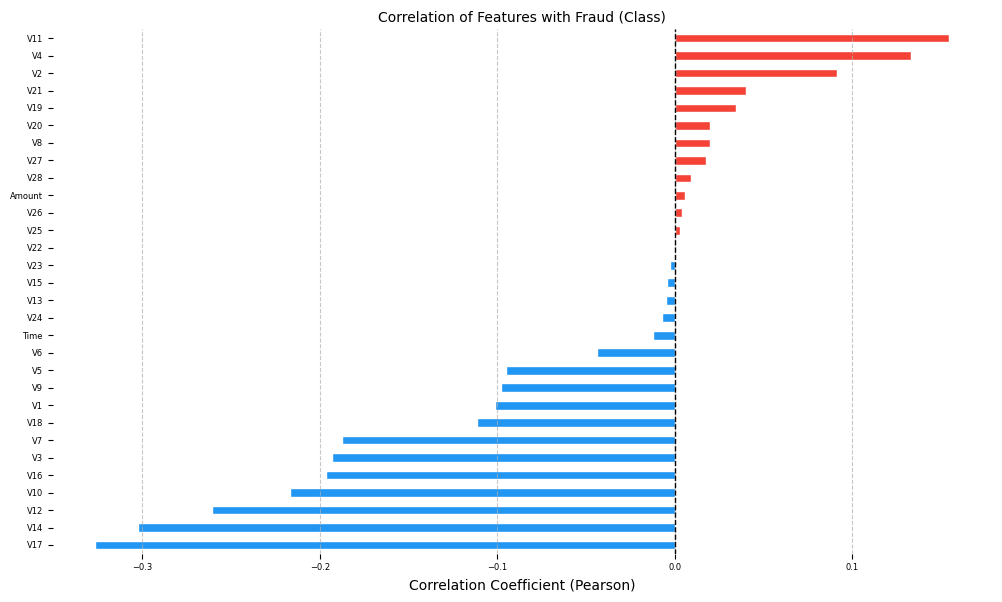

In [0]:
# Collecting data
correlation_values = df.corr()['Class']

if 'Class' in  correlation_values.index:
    plot_data = correlation_values.drop('Class').sort_values()

else:
    plot_data = correlation_values.sort_values()


# Colors 
colors = ['#f44336' if x > 0 else '#2196f3' for x in plot_data]

# Figure
plt.figure(figsize = (10, 6))

# Plot
plot_data.plot(
    kind = 'barh', 
    color = colors, 
    edgecolor = 'white'
)

plt.title('Correlation of Features with Fraud (Class)', fontsize = 10)
plt.xlabel('Correlation Coefficient (Pearson)', fontsize = 10)
plt.axvline(x = 0, color = 'black', linestyle = '--', linewidth = 1)
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)

sns.despine(left = True, bottom = True) 

plt.tight_layout()
plt.show()

### Extract the input features and labels from the data set
Extract the required columns and convert the resulting dataframes to NumPy arrays.


In [0]:
# Shape Dataset
df.shape

(284807, 31)

In [0]:
X = df.drop(columns = ['Class']).copy()
y = df['Class'].astype('int').copy()

print(f'The shape X train {X.shape}')
print(f'The shape y train {y.shape}')


The shape X train (284807, 30)
The shape y train (284807,)


### Preprocess selected features an train test split

Create train and test datasets

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33)

The next step is to standardize the input variables so that the model does not inadvertently favor any variable due to its magnitude. The typical way to do this is to subtract the mean and divide by the standard deviation.

In [0]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)


In [0]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,-0.651553,-0.418337,-2.550530,-0.807337,0.306913,-1.500326,-0.524379,0.971555,-0.456516,-0.679324,0.062091,-0.629296,-0.964465,-0.773137,0.269911,0.022911,0.825216,0.834232,-1.554428,0.552353,3.077820,1.159750,-0.280426,-1.904105,0.797674,0.632262,-0.387858,-0.580330,0.622464,4.384952
1,-0.052102,-0.551858,0.863308,1.023237,1.448459,1.743359,1.728325,0.644079,0.536763,-0.854519,-0.056017,1.447198,-2.610642,0.830570,2.009604,-2.141566,0.391591,0.347932,-1.381491,-3.400157,-0.410042,-0.431866,-1.166569,-0.324084,-1.469338,0.749028,-0.561787,-0.044408,0.089063,-0.340788
2,-0.932952,0.550894,-0.538659,0.403381,-1.294616,-1.024525,-0.780618,-0.346710,-0.148436,2.114723,-1.556363,-0.167848,1.457143,0.948100,-0.328311,1.720660,-1.020948,-0.069031,0.384488,1.193459,0.228241,0.304941,1.063892,-0.423396,0.797523,1.292842,-1.358972,0.226779,0.159312,0.085887
3,1.331913,-5.924663,5.496785,-6.610585,-0.772792,-4.006438,-0.041616,-6.838491,-0.163953,-1.790134,-1.816908,-2.481371,4.029096,0.413274,7.171069,-1.644340,2.204886,3.659399,1.180594,0.079355,-5.546959,12.427723,-2.753824,2.910076,0.184536,0.185615,-0.149688,-10.567192,-3.211486,-0.200448
4,0.685489,1.129710,-0.791362,-0.402707,-1.016612,-1.125904,-0.818852,-0.839313,-0.191649,-1.448115,1.589570,1.244746,0.300375,0.597279,-0.242637,-1.102150,-0.705747,0.536813,0.128295,-0.073500,-0.563540,-0.101436,0.408139,0.458071,0.896080,-0.499588,-0.450677,0.021531,-0.165189,-0.295435


In [0]:
pd.DataFrame(X_train).describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,227845.00,227845.00,227845.00,227845.00,227845.00,227845.00,227845.00,227845.00,227845.00,227845.00,227845.00,227845.00,227845.00,227845.00,227845.00,227845.00,227845.00,227845.00,227845.00,227845.00,227845.00,227845.00,227845.00,227845.00,227845.00,227845.00,227845.00,227845.00,227845.00,227845.00
mean,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.00,-28.72,-44.00,-31.76,-4.01,-82.04,-19.58,-35.07,-61.48,-12.22,-22.49,-4.70,-18.70,-5.82,-20.02,-4.80,-16.11,-29.58,-11.32,-8.54,-71.32,-47.77,-13.11,-72.50,-4.68,-19.78,-5.40,-55.68,-46.86,-0.36
25%,-0.86,-0.47,-0.36,-0.58,-0.60,-0.50,-0.58,-0.44,-0.18,-0.58,-0.49,-0.75,-0.40,-0.65,-0.44,-0.64,-0.53,-0.57,-0.59,-0.56,-0.28,-0.31,-0.75,-0.26,-0.59,-0.61,-0.68,-0.17,-0.16,-0.33
50%,-0.21,0.01,0.04,0.12,-0.01,-0.04,-0.20,0.03,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.08,-0.08,-0.00,0.00,-0.08,-0.04,0.01,-0.02,0.07,0.03,-0.11,0.00,0.04,-0.27
75%,0.94,0.67,0.49,0.68,0.53,0.44,0.30,0.46,0.27,0.54,0.41,0.72,0.62,0.66,0.51,0.71,0.60,0.47,0.60,0.56,0.17,0.26,0.73,0.24,0.73,0.67,0.50,0.23,0.24,-0.05
max,1.64,1.25,13.35,6.17,11.93,25.10,54.87,97.10,16.80,14.18,21.72,11.78,7.86,7.16,10.97,9.70,19.74,10.87,5.61,6.86,49.89,37.32,14.50,36.45,7.56,11.66,7.29,78.01,102.79,103.40


A standardized variable has zero mean and a standard deviation of one.

### Support Vector Machine model

In [0]:
# Create a model object
SVM = LinearSVC(class_weight = 'balanced', loss = 'hinge', fit_intercept = False, random_state = 33)

# Train the model in the training data
SVM.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2'}, default='l2'Specifies the norm used in the penalization. The 'l2'penalty is the standard used in SVC. The 'l1' leads to ``coef_``vectors that are sparse.",'l2'
,"loss loss: {'hinge', 'squared_hinge'}, default='squared_hinge'Specifies the loss function. 'hinge' is the standard SVM loss(used e.g. by the SVC class) while 'squared_hinge' is thesquare of the hinge loss. The combination of ``penalty='l1'``and ``loss='hinge'`` is not supported.",'hinge'
,"dual dual: ""auto"" or bool, default=""auto""Select the algorithm to either solve the dual or primaloptimization problem. Prefer dual=False when n_samples > n_features.`dual=""auto""` will choose the value of the parameter automatically,based on the values of `n_samples`, `n_features`, `loss`, `multi_class`and `penalty`. If `n_samples` < `n_features` and optimizer supportschosen `loss`, `multi_class` and `penalty`, then dual will be set to True,otherwise it will be set to False... versionchanged:: 1.3 The `""auto""` option is added in version 1.3 and will be the default in version 1.5.",'auto'
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.For an intuitive visualization of the effects of scalingthe regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"multi_class multi_class: {'ovr', 'crammer_singer'}, default='ovr'Determines the multi-class strategy if `y` contains more thantwo classes.``""ovr""`` trains n_classes one-vs-rest classifiers, while``""crammer_singer""`` optimizes a joint objective over all classes.While `crammer_singer` is interesting from a theoretical perspectiveas it is consistent, it is seldom used in practice as it rarely leadsto better accuracy and is more expensive to compute.If ``""crammer_singer""`` is chosen, the options loss, penalty and dualwill be ignored.",'ovr'
,"fit_intercept fit_intercept: bool, default=TrueWhether or not to fit an intercept. If set to True, the feature vectoris extended to include an intercept term: `[x_1, ..., x_n, 1]`, where1 corresponds to the intercept. If set to False, no intercept will beused in calculations (i.e. data is expected to be already centered).",False
,"intercept_scaling intercept_scaling: float, default=1.0When `fit_intercept` is True, the instance vector x becomes ``[x_1,..., x_n, intercept_scaling]``, i.e. a ""synthetic"" feature with aconstant value equal to `intercept_scaling` is appended to the instancevector. The intercept becomes intercept_scaling * synthetic featureweight. Note that liblinear internally penalizes the intercept,treating it like any other term in the feature vector. To reduce theimpact of the regularization on the intercept, the `intercept_scaling`parameter can be set to a value greater than 1; the higher the value of`intercept_scaling`, the lower the impact of regularization on it.Then, the weights become `[w_x_1, ..., w_x_n,w_intercept*intercept_scaling]`, where `w_x_1, ..., w_x_n` representthe feature weights and the intercept weight is scaled by`intercept_scaling`. This scaling allows the intercept term to have adifferent regularization behavior compared to the other features.",1
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to ``class_weight[i]*C`` forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",'balanced'
,"verbose verbose: int, default=0Enable verbose output. Note that this setting takes advantage of aper-process runtime setting in liblinear that, if enabled, may not workproperly in a multithreaded context.",0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo rando

In [0]:
# Predict the target variable in the test data
y_pred = SVM.predict(X_test)
y_pred[: 10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
# Collecting the probabilities of the model classifications
y_prob = SVM.decision_function(X_test)
y_prob[ : 10]

array([-0.87066687, -0.92862258, -1.0329886 , -1.35908084, -1.02522385,
       -1.0485624 , -0.96018664, -1.21936019, -1.61850722, -1.01560606])

### Model Evaluation

In [0]:
coefficients = pd.Series(SVM.coef_[0], index = df.columns[: - 1])
coefficients

Time      -0.045590
V1        -4.917618
V2         4.203461
V3        -8.588447
V4         4.738671
V5        -5.362011
V6        -1.813315
V7        -9.215574
V8         2.102928
V9        -3.986416
V10       -9.197964
V11        6.006439
V12      -10.597657
V13        0.125937
V14      -10.567226
V15       -0.207945
V16       -8.739923
V17      -15.384110
V18       -5.657676
V19        1.792433
V20        0.946417
V21        1.080978
V22        0.059334
V23       -0.064172
V24       -0.066502
V25        0.261609
V26        0.072670
V27        0.669523
V28        0.258035
Amount     0.151203
dtype: float64

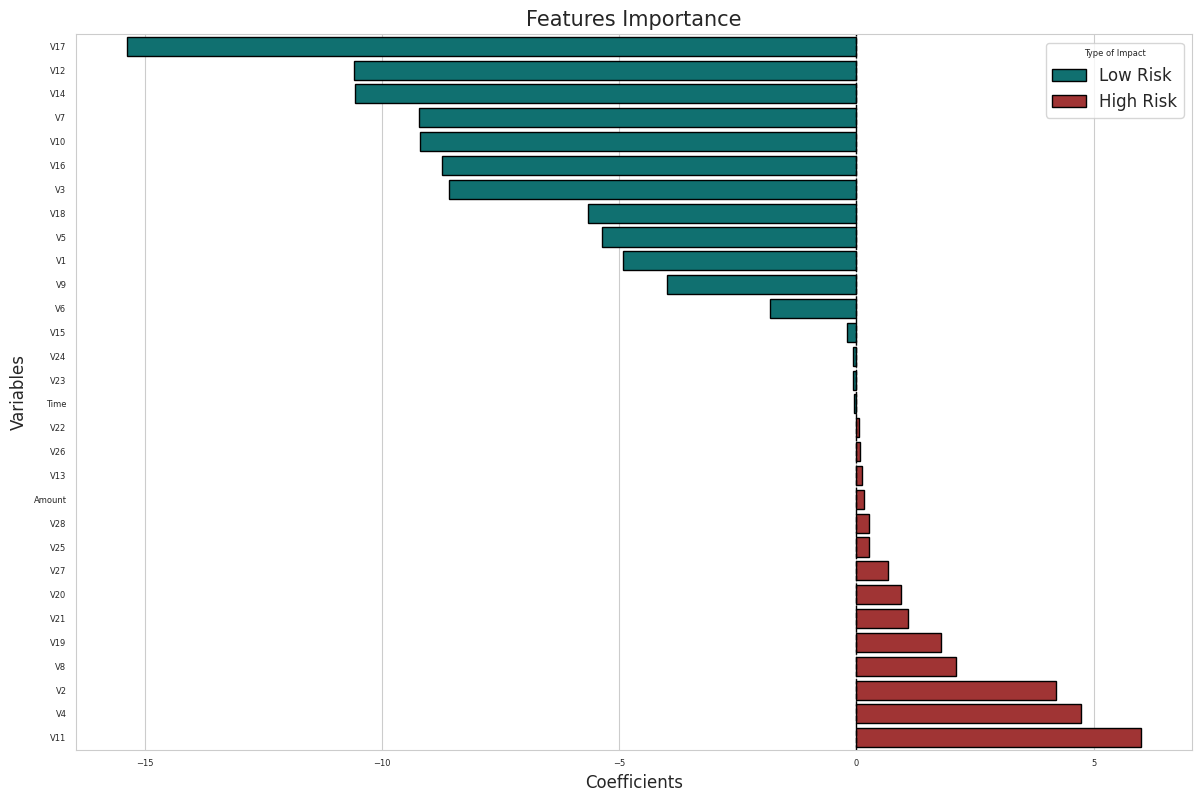

In [0]:
# Data collect
data_ax = coefficients.sort_values().reset_index()
data_ax.columns = ['Feature', 'Coefficient']

# # Creating a category to automatically "paint" the graph
# If > 0 it helps Churn (Bad/Red), if < 0 it retains the customer (Good/Blue)
data_ax['Impact'] = data_ax['Coefficient'].apply(lambda x: 'High Risk' if x > 0 else 'Low Risk')

# Figure
plt.figure(figsize = (12, 8))
sns.set_style('whitegrid')

# Barplot
sns.barplot(
    data = data_ax,
    y = 'Feature',
    x = 'Coefficient',
    edgecolor = 'black',
    hue = 'Impact',
    dodge = False,
    palette = {'High Risk': 'firebrick', 'Low Risk': 'teal'}
)

plt.axvline(x = 0, color = 'black', linestyle = '--', linewidth = 1)
plt.title('Features Importance', fontsize = 15)
plt.xlabel('Coefficients', fontsize = 12)
plt.ylabel('Variables', fontsize = 12)
plt.legend(title = 'Type of Impact', loc = 'upper right', fontsize = 12)

plt.tight_layout()
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.74      0.80      0.77       103

    accuracy                           1.00     56962
   macro avg       0.87      0.90      0.88     56962
weighted avg       1.00      1.00      1.00     56962



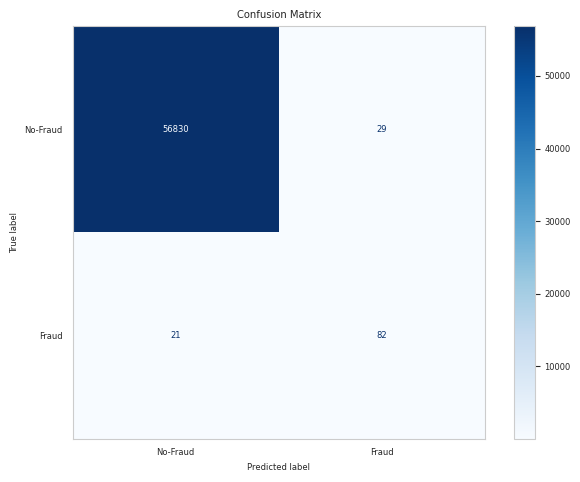

In [0]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, 
    display_labels = ['No-Fraud', 'Fraud'], 
    cmap = 'Blues', 
    values_format = 'd'
)

plt.grid(False) 
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [0]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'AUC-ROC: {roc_auc_score(y_test, y_prob):.2f}')

Accuracy: 1.00
AUC-ROC: 0.94



### Conclusion

---

- The developed **Linear SVM** model demonstrates high statistical robustness and predictive capacity for fraud detection. With an overall **Accuracy of ~100%** (due to class imbalance) and, more importantly, an **Area Under the Curve (AUC-ROC) of 0.94**, the classifier exhibits a discriminatory competence far superior to chance. The model successfully achieved a **Recall of 0.80** for the minority class (Fraud), validating its effectiveness in flagging 80% of fraudulent transactions while maintaining a reasonable precision.

- The analysis of the coefficients reveals clear vectors of influence, divided into risk factors (pushing towards Fraud) and protective factors (indicating Normal behavior):

  - The variables `V11` (+6.00), `V4` (+4.73), and `V2` (+4.20) show the highest positive coefficients. This indicates that high values in these specific Principal Components are the main drivers for classifying a transaction as **Fraudulent**.
  
  - The variables `V17` (-15.38), `V12` (-10.60), and `V14` (-10.57) act as the strongest protective factors. They possess the largest absolute weights in the model, meaning they are the most critical features for confirming the legitimacy of a transaction. A high value in `V17` is the strongest mathematical indicator of a **Normal** transaction.
  
  - Original features such as `Time` (-0.04) and `Amount` (+0.15) showed coefficients relatively close to zero compared to the PCA components. This indicates that the raw transaction value and timestamp have significantly less explanatory power than the structural patterns hidden within the PCA-transformed features (V1-V28).

- The **F1-Score of 0.77** for the Fraud class suggests a balanced trade-off between precision and recall, meaning the model is aggressive enough to catch fraud without generating an unmanageable number of false positives for the bank to investigate.